### The objective of this notebook is to determine if changes to an existing mobile application feature affect click-through-rate and average time spent.

We will begin by importing all the necessary packages.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

We can now import our data file.

In [94]:
df = pd.read_csv("experiment_dataset.csv")

Let's take a look at the head of the dataset.

In [95]:
df.head()

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


By calling the info function on our dataframe we can see that we don't have any missing data.

In [97]:
df.describe(include='all')

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


Before we analyze the results to determine which feature (if any) results in CTR or Time Spent lift, let's make sure that the users are similar in behaviour regardless of age, location, or device. We will use statistical tests to support our analysis.


Since we have a large age range (18-64) we can split our ages into three groups and perform our analysis on them.
- Age1: 18-33
- Age2: 34-48
- Age3: 49-64

In [98]:
def into_age_group(age):
    if age >= 18 and age <= 33:
        return 'Age1'
    elif age >= 34 and age <= 48:
        return 'Age2'
    elif age >= 49 and age <= 64:
        return 'Age3'
    else:
        return 'OutOfRange'

df['Age Group'] = df['Age'].apply(into_age_group)

In [99]:
#Make sure that there aren't any observations that don't fall into our age groups
df[df['Age Group'] == 'OutOfRange']

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR,Age Group


In [100]:
# By age
df.groupby('Age Group')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Age Group,,
Age1,22.719821,0.108169
Age2,22.748237,0.111108
Age3,22.672182,0.108215


Through the analysis above we can see that the Time Spent and CTR values are very similar regardless of age group. We can use an ANOVA test to validate our metrics. If we get a high p-value then they are statistically the same.

In [101]:
# checking time spent
loc_1 = df[df['Age Group'] == 'Age1']['Time Spent']
loc_2 = df[df['Age Group'] == 'Age2']['Time Spent']
loc_3 = df[df['Age Group'] == 'Age3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.016177159428954983, pvalue=0.9839532463342183)


In [102]:
# checking CTR
loc_1 = df[df['Age Group'] == 'Age1']['CTR']
loc_2 = df[df['Age Group'] == 'Age2']['CTR']
loc_3 = df[df['Age Group'] == 'Age3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=1.874256038448427, pvalue=0.15400943084071897)


We can see that our p-values are both above 0.05. The p-value for CTR is a little lower but since it is still above 0.05 can say that it is statistically the same. This means that users behave very similarly in all three age groups and that there is no statistically significant difference between them.

In [103]:
# By location
df.groupby('Location')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Location,,
Location1,22.707286,0.110217
Location2,22.648998,0.108517
Location3,22.787691,0.108708


Through the analysis above we can see that the Time Spent and CTR values are very similar regardless of location. We can use an ANOVA test to validate our metrics. If we get a high p-value then they are statistically the same.

In [104]:
# checking time spent
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


In [105]:
# checking CTR
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


We can see that our p-values are quite high, both of them are much above 0.05. This means that users behaviour very similarly in all three locations and that there is no statistically significant difference between them.

Now we can do the same for device.

In [106]:
# By location
df.groupby('Device')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Device,,
Device1,22.635032,0.109634
Device2,22.890021,0.109868
Device3,22.612276,0.107993


Through the analysis above again we see that the Time Spent and CTR values are very similar regardless of device as well. Again we can use an ANOVA test to validate our metrics. If we get a high p-value then they are statistically the same.

In [107]:
# checking time spent
dev_1 = df[df['Device'] == 'Device1']['Time Spent']
dev_2 = df[df['Device'] == 'Device2']['Time Spent']
dev_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(dev_1, dev_2, dev_3)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


In [108]:
# checking CTR
dev_1 = df[df['Device'] == 'Device1']['CTR']
dev_2 = df[df['Device'] == 'Device2']['CTR']
dev_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(dev_1, dev_2, dev_3)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


Once again we can observe that our p-values are high - much above 0.05. Thus users behaviour very similarly with all three devices and there is no statistically significant difference between them.

This tells us that we can comfortably assign all users to any variant of our experiment.

Now let's check the mean Time Spent and CTR values for each of the variants to see if any features resulted in lift.

In [109]:
time_spent_df = df.groupby('Variant')['Time Spent'].mean()
time_spent_df

Variant
Control      20.070781
Variant A    24.805547
Variant B    23.343783
Name: Time Spent, dtype: float64

<Axes: xlabel='Variant'>

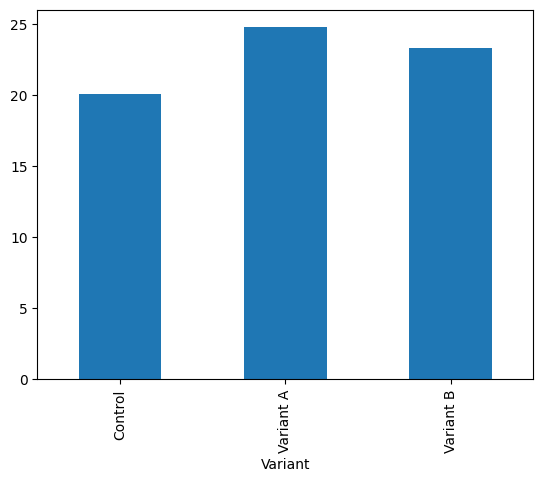

In [110]:
time_spent_df.plot(kind='bar')

In [111]:
CTR_df = df.groupby('Variant')['CTR'].mean()
CTR_df

Variant
Control      0.098554
Variant A    0.120269
Variant B    0.108933
Name: CTR, dtype: float64

<Axes: xlabel='Variant'>

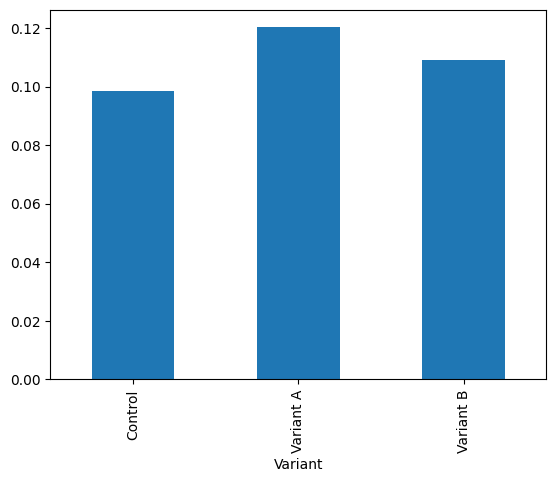

In [112]:
CTR_df.plot(kind='bar')

In [113]:
def percentage_inc_calc(control,var):
    per_inc = ((var - control) / control) * 100
    return per_inc

control_time_spent = 20.070781
var_a_time_spent = 24.805547
var_b_time_spent = 23.343783

control_CTR = 0.098554
var_a_CTR = 0.120269
var_b_CTR = 0.108933

print('The time spent increase for Variant A is ' + str(percentage_inc_calc(control_time_spent, var_a_time_spent)) + "%")
print('The time spent increase for Variant B is ' + str(percentage_inc_calc(control_time_spent, var_b_time_spent)) + "%")

print('The CTR increase for Variant A is ' + str(percentage_inc_calc(control_CTR, var_a_CTR)) + "%")
print('The CTR increase for Variant B is ' + str(percentage_inc_calc(control_CTR, var_b_CTR)) + "%")

The time spent increase for Variant A is 23.59034259802845%
The time spent increase for Variant B is 16.30729765822266%
The CTR increase for Variant A is 22.03360594192016%
The CTR increase for Variant B is 10.53128234267508%


## Key Insights: 
By extracting the mean values in terms of time spent and CTR of the three variants we can see that both variants A and B have a greater time spent and CTR than the control variant. We can also observe that Variant A has the highest mean 'time spent' and 'CTR'.

Therefore both variants A and B result in CTR and Time Spent lift, with Variant A resulting in the most lift in both CTR and Time Spent.

- Variant A results in 23.6% increase in time spent and a 22.0% increase in CTR
- Variant B results in 16.3% increase in time spent and a 10.5% increase in CTR

## Next Step:
Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.



To test for significant statistical difference between the features and the control group we can use T-tests to compare individual variants to the control and ANOVA tests to compare all 3 groups. Before employing these parametric tests we must acknowledge that our data needs conform to the following:
- Independence: each data point should be independent of other data points
- Normality: the distribution of data is normal or close to normal
- Groups have homogeneity of variance
- Data is measured on an interval or ratio scale

I will assume that each of these data points come from different users and are all independent of eachother.

Next, to check if the distribution of the data is normal or close to normal we can plot histograms of the 'Time Spent' and 'CTR'.

<Axes: >

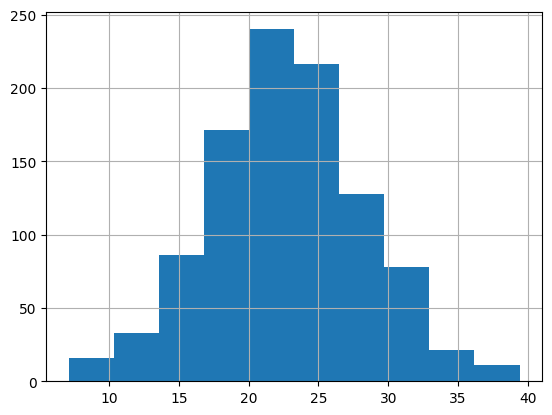

In [114]:
df['Time Spent'].hist()

<Axes: >

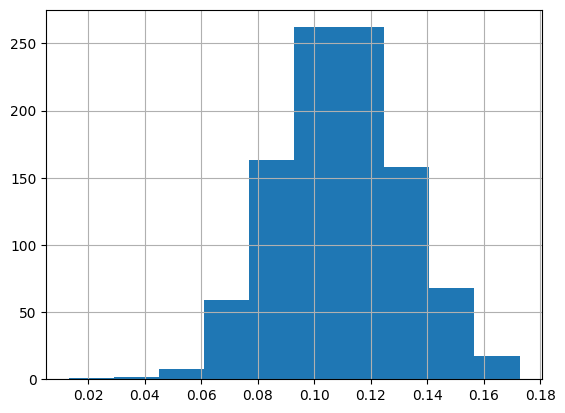

In [115]:
df['CTR'].hist()

From these graphs we can see that they follow a normal distribution.

To check if groups have homogeneity of variance we can plot boxplots for each group and compare the spread visually.

<Axes: xlabel='Variant', ylabel='Time Spent'>

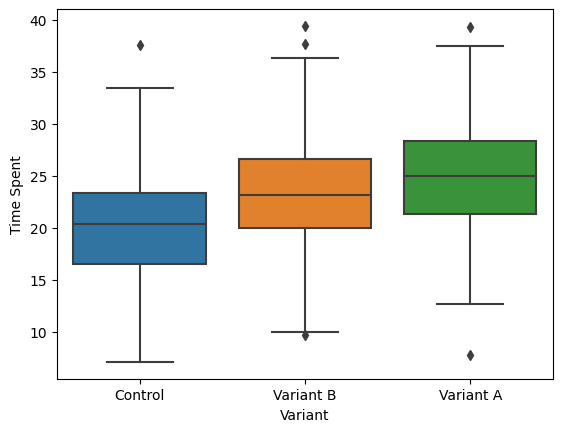

In [116]:
sns.boxplot(data = df, x='Variant', y='Time Spent')

<Axes: xlabel='Variant', ylabel='CTR'>

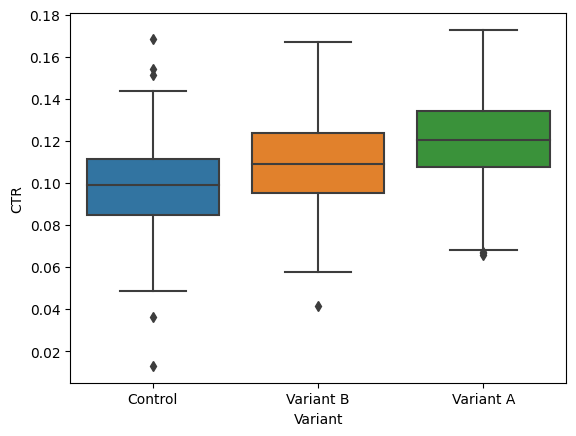

In [117]:
sns.boxplot(data = df, x='Variant', y='CTR')

From these graphs we can see that groups have homogeneity of variance.

We can also claim that the data is measured on a ratio scale since the order matters, the differences are measurable and there is a 0 starting point.

Now we are ready to conduct ANOVA tests to compare all three groups (Control, Variant 1, and Variant 2).

In [118]:
# checking time spent
var1 = df[df['Variant']=='Variant A']['Time Spent']
var2 = df[df['Variant']=='Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']

p_val = stats.f_oneway(var1, var2, control)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


In [119]:
# checking CTR
var1 = df[df['Variant']=='Variant A']['CTR']
var2 = df[df['Variant']=='Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']

p_val = stats.f_oneway(var1, var2, control)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


From the results of our ANOVA tests we can see that both Time Spent and CTR have statistically significant results. This shows us that the control group and the variants have completely different behaviours in their interaction with the feature, based on which variant of the feature they have been given.

Now we are ready to conduct independent t-tests for each variant compared to the control, and the variants compared to eachother.

In [120]:
# compare time spent

varA = df[df['Variant']=='Variant A']['Time Spent']
varB = df[df['Variant']=='Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']

p_val = stats.ttest_ind(varA, control)
p_val_2 = stats.ttest_ind(varB, control)
p_val_3 = stats.ttest_ind(varA, varB)
print(p_val)
print(p_val_2)
print(p_val_3)

Ttest_indResult(statistic=12.142363487472364, pvalue=8.488565644996449e-31)
Ttest_indResult(statistic=8.174237395991806, pvalue=1.496358076285182e-15)
Ttest_indResult(statistic=3.6788175394209075, pvalue=0.0002534771014765265)


When comparing Time Spent, we can see that there are significant differences between both variants and the control. The p-value in the t-test that compares the two variants (A and B) is larger than the other p-values, however it is still much smaller than 0.05 and we can consider the difference to be significant. This means that there is one variant that performs better than the others.

In [121]:
# compare CTR

varA = df[df['Variant']=='Variant A']['CTR']
varB = df[df['Variant']=='Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']

p_val = stats.ttest_ind(varA, control)
p_val_2 = stats.ttest_ind(varB, control)
p_val_3 = stats.ttest_ind(varA, varB)
print(p_val)
print(p_val_2)
print(p_val_3)

Ttest_indResult(statistic=13.829424737499187, pvalue=1.9602781373243157e-38)
Ttest_indResult(statistic=6.4718143491783255, pvalue=1.8743198199982106e-10)
Ttest_indResult(statistic=7.08499696316128, pvalue=3.587180487986577e-12)


When comparing CTR, again we can observe that there are significant differences between both variants and the control. This again means that we should have one variant that performs better than the others.

Now that we know one of the variants worked better than the others let's remind ourselves as to which variant worked best!

In [122]:
time_spent_df = df.groupby('Variant')['Time Spent'].mean()
time_spent_df

Variant
Control      20.070781
Variant A    24.805547
Variant B    23.343783
Name: Time Spent, dtype: float64

This shows us that Variant A got users to spend the most time interacting with the feature. From our previous analysis we know that this is statistically significant and not just a coincidence! So we should implement variant A to increase Time Spent.

In [123]:
CTR_df = df.groupby('Variant')['CTR'].mean()
CTR_df

Variant
Control      0.098554
Variant A    0.120269
Variant B    0.108933
Name: CTR, dtype: float64

The above results demonstrates that Variant A got users to click through the feature the most. Again, we know that this is statistically significant and not a coincidence. Therefore we should implement variant A to increase CTR.

Let's summarize the results and make a recommendation to the engineering team about which feature to deploy.



## Summary and Recommendation:

In summary we have gathered a lot from our insights and we can make a suggestion for which variant to deploy with strong evidence for our choice.

From our analysis we found that there is no statistically significant difference in user behaviour regardless of their age, location or device.
 
We then found that in comparison to the control variant:
- The time spent increase for Variant A was 23.6%
- The time spent increase for Variant B was 16.3%
- The CTR increase for Variant A was 22.0%
- The CTR increase for Variant B was 10.5%
 
We then confirmed that these results were statistically significant by using ANOVA tests and T-tests. Before using these tests we ensured that our data met the following criteria as it is necessary:
- Independence: each data point should be independent of other data points
- Normality: the distribution of data is normal or close to normal
- Groups have homogeneity of variance
- Data is measured on an interval or ratio scale
 
After ensuring that our data met the above criteria we ran our tests and found that all the differences between the variants and the control group were statistically significant. This meant that one variant performed better than the others.
 
In conclusion we can see that Variant A resulted in a greater increase in time spent, as well as a greater increase in CTR when compared to Variant B and the control group. We have also conducted T-tests and ANOVA tests to ensure that the difference is statistically significant. Therefore to increase the amount of time users spend on the feature and how much they click through it, the engineering team should deploy feature A.


## Roll-out Plan:
Let's create a roll-out plan. How quickly shall we introduce the feature to our audience?

I think that it is important to release the feature to more and more users in batches, and not to release it to all of them at once. However, I think all users should have the feature within a month so that users don't feel neglected for not having the feature for too long. Therefore I would roll-out the feature in a span of 3 weeks.
 
Week 1: 
- During week one I would release the feature to 1/3 of the user base. I would make sure that the users from the experiment that already had access to this feature are part of the 1/3 of the user base that is chosen. This is because they are already familiar with this version of the feature.
- During this time I would also create a rollback plan in case we run into any unexpected issues like application crashing bugs. By having a rollback plan we can quickly respond to any negative issues if they arise.
- I would also ask that customer service representatives get training on inquiries related to the feature as users may have many questions with this new variant of the feature.
- I would also add an in-app tutorial that demonstrates to users how to use the new variant of the feature.
- At this time I would continue to monitor user engagement with the feature through CTR and time spent.
 
Week 2:
- During week two I would release the feature to another third of the user base so that 2/3 of the user base has access to the new variant of the feature.
- I would still continue to monitor user engagement with the feature through CTR and time spent.
- I would also keep track of our app store reviews to check if users are commenting (negatively or positively) on the feature change, and if they are changing the star rating that they have given the app.
- I would runs tests and confirm with the engineering team that our application can handle the entire user base running the new version of the feature. This is extremely important for us to know before we release the feature to the entire userbase next week.
 
Week 3:
- During week three (if everything has gone well so far) I would release the feature to the entire user base (3/3).
- With the feature release I would also create promotional videos and social media posts to get the userbase excited for the full release. The comment section of social media platforms are also a good place for us to extract user feedback.
- At this stage and moving forward I would continue to monitor user engagement with the feature through CTR and time spent.
 
This rollout plan ensures that we are releasing the feature iteratively so that we can measure and reassess our feature through each rollout step. We are also not waiting too long for the entire userbase to get access to the feature. We are making sure that our customer service team and application infrastructure can handle the release of the new feature. We are making sure that users are excited for the feature with promotional videos and social media posts. Users will know how to use the feature with the in-app tutorial. Finally, we are making sure to track users engagement metrics and feedback throughout the rollout process and we should continue to do so. 

